**<center>CS559 Fall 2021 Midterm</center>**
**<center>Due: in 90 minutes <center>**

The second part of the midterm contains the computations to solve machine learning problems. It is an open-notes exam and students can only use lecture notes and demonstration files provided from the class. 
Students are not allowed to use any other modules than $\color{red}{\textbf{Numpy, Pandas, and Matplot}}$. 

Although there are no plotting questions, students are welcome to display plots to confirm their answers. 

Students must submit the exam **90 minutes from the start**. 

Good luck!

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1 [20 pts]

This question is a gradient descent problem and students are required to find a weight vector of the actual quadratic function of the provided data, `gradient_question.csv`. The dataset has two columns, x and y, where y is the true target variable. 

### 1-1.
Write a short function called `my_gradient()` that optimizes the weight vector using the squared error function and returns the weight vector when the acceptance of error is below 0.05 and the learning rate $\eta$ is 0.001. [12 pts] 

[-11.68028539]


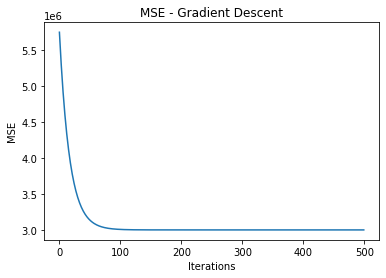

In [23]:
def my_gradient(x, y, iterations = 500, learning_rate = .001):
    n = 1 #number of features
    m = x.shape[0] #number of samples
    w = np.ones(1)
    cost = []
    for i in range(0, iterations):
        y_predict = x**2 + x * w 
        y_error = y_predict - y
        mse = (1/2 * m) * np.sum(y_error ** 2)
        g = (1/ m) * x.T.dot(y_error)
        w = w - learning_rate * g
        cost.append(mse)
        
    plt.plot(list(range(0, iterations)), cost)
    plt.xlabel('Iterations')
    plt.ylabel('MSE')
    plt.title('MSE - Gradient Descent')
    
    return w
data = pd.read_csv('gradient_question.csv')
x = data.x.values
y = data.y.values
weights = my_gradient(x, y)
print(weights)

### 1-2.

Using the optimized weight vector, find the local maximum. [8 pts]

In [28]:
# ### code starts here. 
# print(weights)
# print(x)

# x_where_slope_zero = np.linalg.solve(weights, 0)
# print(x_where_slope_zero)

## Question 2 [20 pts]

This question is a probability classification problem. Assuming that training a mixture of Gaussians model by maximum likelihood, students will find P(1|0.75) using data `Probability_Classification.csv`. In the dataset, there are two columns, **x** and **class**, where the **class** is the binary class.  

### 2-1
Find the prior, expected value, and variance for each class. [12 pts]

In [65]:
### code starts here
df = pd.read_csv('Probability_Classification.csv')
x = df.x.values
c = df['class'].values

df['prob'] = prob = (1 + c) / (c.sum() + len(c))

class_dict = {}
for cl in df['class'].unique():
    subset_df = df[df['class'] == cl]
    var = np.var(subset_df.prob.values)
    class_dict[cl] = {'variance': var, 'prior': subset_df.iloc[0].prob}
    
print(class_dict)

{0: {'variance': 1.2037062152420224e-35, 'prior': 0.02}, 1: {'variance': 4.81482486096809e-35, 'prior': 0.04}}


### 2-2
Find the probability P(1|0.75)? [8 pts]

In [81]:
### code starts here
subset_df = df[df['class'] == 1]
prob = 1 / np.sqrt(2 * np.pi * class_dict[1]['variance']**2)
prob = np.exp(-subset_df.prob.mean() ** 2/2*class_dict[1]['variance']**2)
print('P(1|0.75)', prob)

P(1|0.75) 1.0


### Question 3 [20 pts]

This question is a linear classification problem. Students are going to build the binary SVM and Logistic Regression to classify the data set, `LR_SVM.csv`. In the dataset, there are four columns, **x1**, **x2**, **y**, and **a**, where **y** is the class and **a** is the Lagrange Multiplier. You can attack the problem by 

### 3-1
Using the weight vector $\vec{w}=[-5.653, 1.199, 0.822]$, build a Logisitc Regression Classifier, $\sigma(\vec{w}\cdot \vec{x})\ge0.5$, and classify each $\vec{x}=[x1,x2]^T$. Please do not copy and use the implemented logistic regression from Assignment 2. Determine which class $\vec{x}=[3,3]^T$ belongs to. [10 pts]

In [66]:
### code starts here
data = pd.read_csv('LR_SVM.csv')
X = data[['x1','x2']].values
y = data.y.values
a = data.a.values
w = np.array([-5.653, 1.199])
b = 0.822

def logistic_regression(X, w, b):
    predict = np.dot(X, w) + b
    predict = 1.0 /(1 + np.exp(-predict))
    if len(predict.shape) != 0:
        predict = [1 if i >= .5 else 0 for i in predict]
    else:
        predict = 1 if predict >= .5 else 0
    return predict

log_predict = logistic_regression(X, w, b)
X_test = np.array([3, 3])
class_predict = logistic_regression(X_test, w, b)
print(f'X = [3, 3] belongs to class: {class_predict}')

X = [3, 3] belongs to class: 0


### 3-2

You are going to build a SVM classifier  by following:
a) Find the equation of the SVM hyperplane h(x) and classify each $\vec{x}$, b) calculate the distance of each point from the hyperplane and print the support vectors, and c) classify the point $\vec{x}=[3,3]^T$ using h(x) from a). [10 pts]

In [73]:
### code starts here

def svm(X, y, w, b):
    distances = 1 - y * (np.dot(X, w) + b)
    distances[distances < 0] = 0
    dw = np.zeros(len(w))
    for idx, dist in enumerate(distances):
        if max(0, dist) == 0:
            dw2 = w
        else:
            dw2 = w - (.001 * y[idx] * X[idx])
        dw += dw2
    dw = dw/ len(y)
    return dw, distances
vectors, distances = svm(X, y, w, b)
print('Support Vector', vectors)
print(f'Distance', distances)

Support Vector [-5.65504  1.19736]
Distance [19.3129 17.994   0.      0.     22.4822  0.     15.1675  0.794   0.
 22.619 ]


In [77]:
distance_of_point = 1 - class_predict * (np.dot(X_test, w) + b)
print(f'Distance of Point', distance_of_point)

Distance of Point 1.0
